In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
!pip install cftime

In [2]:
#!mkdir /content/drive/MyDrive/volmip

In [3]:
# !earthengine authenticate
import ee
import os

# Set the path to the service account key file
service_account = 'editor@ee-manmeet20singh15-wbis.iam.gserviceaccount.com'
key_file = 'drive/MyDrive/earth_engine/ee-manmeet20singh15-wbis-fab7f1ca35e0.json'

# Use the service account for authentication
credentials = ee.ServiceAccountCredentials(service_account, key_file)
ee.Initialize(credentials)

In [4]:
download_data = True
data_prep = True
initialize_ee = False
if initialize_ee:
    !earthengine authenticate
import numpy as np
import xarray as xr
import pandas as pd
import cftime

In [5]:
#!pip install wxee

In [6]:
# if download_data:
#     import ee
#     ee.Initialize()
#     import wxee
#     wxee.Initialize()

In [7]:
if download_data:
    !git clone https://github.com/scotthosking/get-station-data.git
    !mv get-station-data/* .
    !pip install -v -e .

fatal: destination path 'get-station-data' already exists and is not an empty directory.
mv: cannot stat 'get-station-data/*': No such file or directory
Using pip 24.1.2 from /usr/local/lib/python3.11/dist-packages/pip (python 3.11)
Obtaining file:///content
  Running command python setup.py egg_info
  running egg_info
  creating /tmp/pip-pip-egg-info-1c2lfvcc/get_station_data.egg-info
  writing /tmp/pip-pip-egg-info-1c2lfvcc/get_station_data.egg-info/PKG-INFO
  writing dependency_links to /tmp/pip-pip-egg-info-1c2lfvcc/get_station_data.egg-info/dependency_links.txt
  writing requirements to /tmp/pip-pip-egg-info-1c2lfvcc/get_station_data.egg-info/requires.txt
  writing top-level names to /tmp/pip-pip-egg-info-1c2lfvcc/get_station_data.egg-info/top_level.txt
  writing manifest file '/tmp/pip-pip-egg-info-1c2lfvcc/get_station_data.egg-info/SOURCES.txt'
  reading manifest file '/tmp/pip-pip-egg-info-1c2lfvcc/get_station_data.egg-info/SOURCES.txt'
  adding license file 'LICENSE'
  writing

In [8]:
import pandas as pd
if download_data:
    from get_station_data.util import nearest_stn
    from get_station_data import ghcnd

%matplotlib inline

In [9]:
if download_data:
    stn_md = ghcnd.get_stn_metadata()

In [10]:
if download_data:
    london_lon_lat = -0.1278, 51.5074
    austin_lon_lat = -97.7603, 30.3208
    nigeria_lon_lat = 8.6753, 9.0820
    iran_lon_lat = 53.6880, 32.4279
    india_lon_lat = 80, 20
    punjab_lon_lat = 74, 28
    china_lat_lon = 104.1954, 35.8617
    texas_lon_lat = -99.71, 32.36
    my_stns = nearest_stn(stn_md,
                            texas_lon_lat[0], texas_lon_lat[1],
                            n_neighbours=1000)

In [11]:
if download_data:
    my_stns.iloc[[0]]

In [12]:
lat_start, lat_end, lon_start, lon_end =  26, 36, -107, -93.4

In [13]:
if download_data:
    my_stns = my_stns[my_stns['lat']>lat_start][my_stns['lat']<lat_end][my_stns['lon']>lon_start][my_stns['lon']<lon_end]
    my_stns

In [14]:
#my_stns.shape

In [15]:
# # df_ = pd.DataFrame()
# # if download_data:
# #     for i in range(my_stns.shape[0]):
# #         df = ghcnd.get_data(my_stns.iloc[[i]])
# #         df_ = df_.append(df)

# import pandas as pd

# df_ = pd.DataFrame()
# if download_data:
#     for i in range(my_stns.shape[0]):
#         df = ghcnd.get_data(my_stns.iloc[[i]])
#         df_ = pd.concat([df_, df], ignore_index=True)

In [16]:
#df_

In [17]:
# if download_data:
#     df__ = df_.copy() #df_[df_['element']=='PRCP'].copy()
#     df_stations = df__.drop_duplicates().reset_index(drop=True).copy() #  df__[df__['name']=='TX AUSTIN-CAMP MABRY'].copy()
#     # df_stations['month'] = df_stations['month'].astype(str).str.zfill(2)
#     # df_stations['day'] = df_stations['day'].astype(str).str.zfill(2)
#     # df_stations['datetime'] = df_stations['year'].astype(str)+df_stations['month']+df_stations['day']
#     df_stations['datetime'] = pd.to_datetime(df_stations['date'], format="%Y%m%d")
#     df_stations = df_stations.set_index(['datetime'])

In [18]:
# if download_data:
#     df_stations.element.unique()

In [19]:
#df_stations.head()

In [20]:
# if download_data:
#     cols = ['value']
#     for name in df_stations.name.unique():
#         print(name)
#         #df_camp_mabry[cols][df_camp_mabry['name']=='TX AUSTIN-CAMP MABRY'].plot()
#         df_stations[cols][df_stations['element']=='PRCP'].plot()

# Transform station data into netcdf file which

Dimensions for each variable: time x stations

time coordinate will be from the pandas dataframe

stations coordinate will have the value as name of each station

In [21]:
# date_start, date_end = df_stations.index.min(), df_stations.index.max()
# date_start, date_end
# dates = pd.date_range(start=date_start, end=date_end)
# dates

In [22]:
# df_stations

In [23]:
# df_stations.name.unique()

In [24]:
# vars = df_stations[df_stations['name']=='LAHORE CITY'].element.unique()
# vars

In [25]:
# df_onestation_onevariable = df_stations[(df_stations['element']=='PRCP') & (df_stations['name']=='LAHORE CITY')]
# #type(df_onestation_onevariable['value'])
# df_onestation_onevariable_ = df_onestation_onevariable['value'].reindex(dates)
# df_onestation_onevariable_.plot()

In [26]:
# stations = df_stations.name.unique()
# print(stations, stations.shape)

In [27]:
# df_stations = df_stations.drop_duplicates().reset_index(drop=True).copy()
# df_stations

In [28]:
# df_onestation_onevariable['value'].plot()

In [29]:
# df_stations = df_stations[~df_stations.index.duplicated(keep='first')].copy()
# df_stations

In [30]:
# data = []
# for station in stations:
#     df_onestation_onevariable = df_stations[(df_stations['element']=='TAVG') & (df_stations['name']==station)]#.drop_duplicates().reset_index(drop=True)
#     df_onestation_onevariable = df_onestation_onevariable[~df_onestation_onevariable.index.duplicated(keep='first')].copy()
# #type(df_onestation_onevariable['value'])
# #    subset_df = df_onestation_onevariable.drop_duplicates().copy()
#     df_onestation_onevariable_ = df_onestation_onevariable['value'].reindex(dates)
#     data.append(df_onestation_onevariable_)
# data = np.asarray(data).T
# data.shape

In [31]:
# type(data)

In [32]:
# import xarray as xr
# ds = xr.Dataset({
#     'tavg': xr.DataArray(
#                 data   = data,   # enter data here
#                 dims   = ['time', 'station'],
#                 coords = {'time': dates,'station':stations },
#                 ),
#             },
#     )

In [33]:
# ds.tavg.isel(station=0).plot()

In [34]:
# data = []
# for station in stations:
#     df_onestation_onevariable = df_stations[(df_stations['element']=='TMAX') & (df_stations['name']==station)]#.drop_duplicates().reset_index(drop=True)
# #type(df_onestation_onevariable['value'])
#     df_onestation_onevariable = df_onestation_onevariable[~df_onestation_onevariable.index.duplicated(keep='first')].copy()
#     df_onestation_onevariable_ = df_onestation_onevariable['value'].reindex(dates)
#     data.append(df_onestation_onevariable_)
# data = np.asarray(data).T
# ds['tmax'] = (('time', 'station'), data)

# data = []
# for station in stations:
#     df_onestation_onevariable = df_stations[(df_stations['element']=='TMIN') & (df_stations['name']==station)]#.drop_duplicates().reset_index(drop=True)
#     df_onestation_onevariable = df_onestation_onevariable[~df_onestation_onevariable.index.duplicated(keep='first')].copy()
# #type(df_onestation_onevariable['value'])
#     df_onestation_onevariable_ = df_onestation_onevariable['value'].reindex(dates)
#     data.append(df_onestation_onevariable_)
# data = np.asarray(data).T
# ds['tmin'] = (('time', 'station'), data)

# data = []
# for station in stations:
#     df_onestation_onevariable = df_stations[(df_stations['element']=='PRCP') & (df_stations['name']==station)]#.drop_duplicates().reset_index(drop=True)
#     df_onestation_onevariable = df_onestation_onevariable[~df_onestation_onevariable.index.duplicated(keep='first')].copy()
# #type(df_onestation_onevariable['value'])
#     df_onestation_onevariable_ = df_onestation_onevariable['value'].reindex(dates)
#     data.append(df_onestation_onevariable_)
# data = np.asarray(data).T
# ds['pr'] = (('time', 'station'), data)

In [35]:
# ds.mean(dim='station').tmax.plot()

In [36]:
# ds.mean(dim='station').pr.plot()

In [37]:
# ds_obs = ds.copy()

# CMAP precipitation data

In [38]:
!wget https://psl.noaa.gov/thredds/fileServer/Datasets/cmap/enh/precip.mon.mean.nc

--2025-02-03 23:06:05--  https://psl.noaa.gov/thredds/fileServer/Datasets/cmap/enh/precip.mon.mean.nc
Resolving psl.noaa.gov (psl.noaa.gov)... 140.172.38.12
Connecting to psl.noaa.gov (psl.noaa.gov)|140.172.38.12|:443... connected.
HTTP request sent, awaiting response... 200 
Length: 16188748 (15M) [application/x-netcdf]
Saving to: ‘precip.mon.mean.nc.4’

precip.mon.mean.nc. 100%[===================>]  15.44M  29.8MB/s    in 0.5s    

2025-02-03 23:06:05 (29.8 MB/s) - ‘precip.mon.mean.nc.4’ saved [16188748/16188748]



In [39]:
!ls -lrt

total 3566592
-rw-r--r-- 1 root root 177912031 Sep 19  2022 pr_day_ACCESS-CM2_historical_r1i1p1f1_gn_1980.nc
-rw-r--r-- 1 root root 178482387 Sep 19  2022 pr_day_ACCESS-CM2_historical_r1i1p1f1_gn_1979.nc
-rw-r--r-- 1 root root 177049825 Sep 19  2022 pr_day_ACCESS-CM2_historical_r1i1p1f1_gn_1982.nc
-rw-r--r-- 1 root root 176608893 Sep 19  2022 pr_day_ACCESS-CM2_historical_r1i1p1f1_gn_1981.nc
-rw-r--r-- 1 root root 179508881 Sep 19  2022 pr_day_ACCESS-CM2_historical_r1i1p1f1_gn_1983.nc
-rw-r--r-- 1 root root 179433066 Sep 19  2022 pr_day_ACCESS-CM2_historical_r1i1p1f1_gn_1985.nc
-rw-r--r-- 1 root root 178435455 Sep 19  2022 pr_day_ACCESS-CM2_historical_r1i1p1f1_gn_1984.nc
-rw-r--r-- 1 root root 180008883 Sep 19  2022 pr_day_ACCESS-CM2_historical_r1i1p1f1_gn_1986.nc
-rw-r--r-- 1 root root 179101854 Sep 19  2022 pr_day_ACCESS-CM2_historical_r1i1p1f1_gn_1987.nc
-rw-r--r-- 1 root root 178975338 Sep 19  2022 pr_day_ACCESS-CM2_historical_r1i1p1f1_gn_1989.nc
-rw-r--r-- 1 root root 178778900 Sep

In [40]:
ds_cmap = xr.open_dataset('precip.mon.mean.nc')

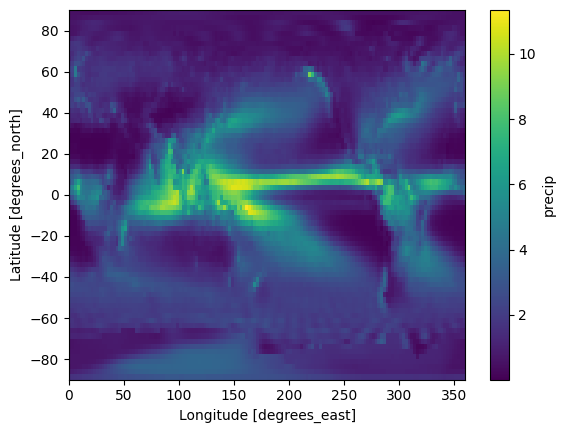

In [41]:
ds_cmap.precip.mean(dim='time').plot()

In [42]:
ds_cmap

<xarray.Dataset> Size: 23MB
Dimensions:  (lat: 72, lon: 144, time: 552)
Coordinates:
  * lat      (lat) float32 288B 88.75 86.25 83.75 81.25 ... -83.75 -86.25 -88.75
  * lon      (lon) float32 576B 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * time     (time) datetime64[ns] 4kB 1979-01-01 1979-02-01 ... 2024-12-01
Data variables:
    precip   (time, lat, lon) float32 23MB 0.21 0.21 0.21 0.2 ... 0.38 0.38 0.37
Attributes:
    Conventions:    COARDS
    title:          CPC Merged Analysis of Precipitation (includes NCEP Reana...
    platform:       Analyses
    source:         ftp ftp.cpc.ncep.noaa.gov precip/cmap/monthly
    dataset_title:  CPC Merged Analysis of Precipitation
    documentation:  https://www.esrl.noaa.gov/psd/data/gridded/data.cmap.html
    date_modified:  26 Feb 2019
    References:     https://www.psl.noaa.gov/data/gridded/data.cmap.html
    version:        V2501
    history:        update 01/2025 V2501
    data_modified:  2025-01-13

In [43]:
ds_texas = ds_cmap.sel(lat=slice(lat_end, lat_start)).sel(lon=slice(lon_start+180, lon_end+180))
ds_texas

<xarray.Dataset> Size: 57kB
Dimensions:  (lat: 4, lon: 6, time: 552)
Coordinates:
  * lat      (lat) float32 16B 33.75 31.25 28.75 26.25
  * lon      (lon) float32 24B 73.75 76.25 78.75 81.25 83.75 86.25
  * time     (time) datetime64[ns] 4kB 1979-01-01 1979-02-01 ... 2024-12-01
Data variables:
    precip   (time, lat, lon) float32 53kB 1.49 1.59 0.93 0.23 ... 0.17 0.01 0.0
Attributes:
    Conventions:    COARDS
    title:          CPC Merged Analysis of Precipitation (includes NCEP Reana...
    platform:       Analyses
    source:         ftp ftp.cpc.ncep.noaa.gov precip/cmap/monthly
    dataset_title:  CPC Merged Analysis of Precipitation
    documentation:  https://www.esrl.noaa.gov/psd/data/gridded/data.cmap.html
    date_modified:  26 Feb 2019
    References:     https://www.psl.noaa.gov/data/gridded/data.cmap.html
    version:        V2501
    history:        update 01/2025 V2501
    data_modified:  2025-01-13

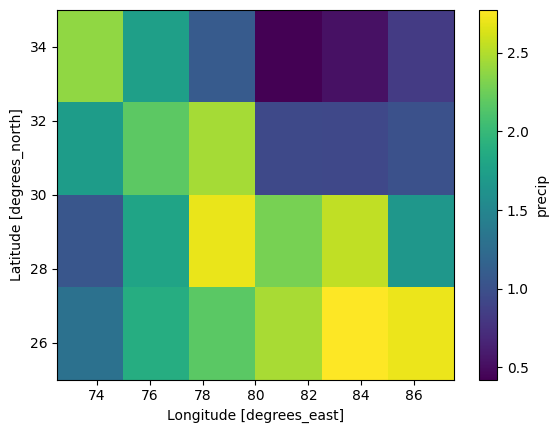

In [44]:
ds_texas.precip.mean(dim='time').plot()

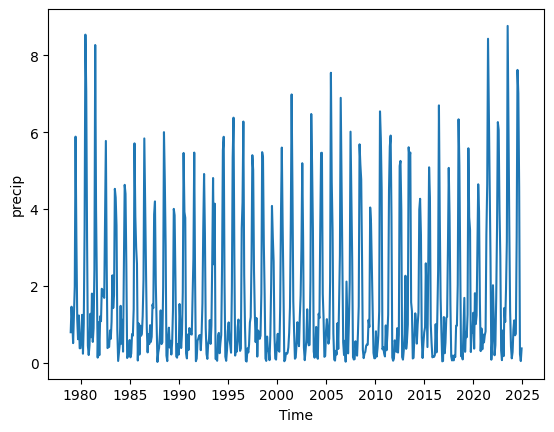

In [45]:
ds_texas.precip.mean(dim='lat').mean(dim='lon').plot()

# NASA NEX CMIP6 from AWS

# First select the best models based on monthly climatology

In [46]:
vars = ['pr', 'rsds', 'sfcWind', 'tas', 'tasmin', 'tasmax', 'hurs', 'huss']
vars = ['pr', 'tasmin', 'tasmax']
vars = ['pr']
scenarios = ["historical", "ssp245", "ssp585"]
scenarios = ["historical"]
models = ['ACCESS-CM2',
 'ACCESS-ESM1-5',
 'BCC-CSM2-MR',
 'CanESM5',
 'CESM2-WACCM',
 'CESM2',
 'CMCC-CM2-SR5',
 'CMCC-ESM2',
 'CNRM-CM6-1',
 'CNRM-ESM2-1',
 'EC-Earth3-Veg-LR',
 'EC-Earth3',
 'FGOALS-g3',
 'GFDL-CM4',
 'GFDL-CM4_gr2',
 'GFDL-ESM4',
 'GISS-E2-1-G',
 'HadGEM3-GC31-LL',
 'IITM-ESM',
 'INM-CM4-8',
 'INM-CM5-0',
 'IPSL-CM6A-LR',
 'KACE-1-0-G',
 'KIOST-ESM',
 'MIROC-ES2L',
 'MIROC6',
 'MPI-ESM1-2-HR',
 'MPI-ESM1-2-LR',
 'MRI-ESM2-0',
 'NESM3',
 'NorESM2-LM',
 'NorESM2-MM',
 'TaiESM1',
 'UKESM1-0-LL']

ensembles = ['r1i1p1f1',
             'r1i1p1f1',
              'r1i1p1f1',
              'r1i1p1f1',
              'r3i1p1f1',
              'r4i1p1f1',
              'r1i1p1f1',
              'r1i1p1f1',
              'r1i1p1f2',
              'r1i1p1f2',
              'r1i1p1f1',
              'r1i1p1f1',
              'r3i1p1f1',
              'r1i1p1f1',
              'r1i1p1f1',
              'r1i1p1f1',
              'r1i1p1f2',
              'r1i1p1f3',
              'r1i1p1f1',
              'r1i1p1f1',
              'r1i1p1f1',
              'r1i1p1f1',
              'r1i1p1f1',
              'r1i1p1f1',
              'r1i1p1f2',
              'r1i1p1f1',
              'r1i1p1f1',
              'r1i1p1f1',
              'r1i1p1f1',
              'r1i1p1f1',
              'r1i1p1f1',
              'r1i1p1f1',
              'r1i1p1f1',
              'r1i1p1f2']

#VolMIP models for India
# models = [ 'CanESM5',
#  'MIROC-ES2L',
#  'MPI-ESM1-2-LR']

# ensembles = [ 'r1i1p1f1',
#               'r1i1p1f2',
#               'r1i1p1f1']

In [47]:
len(models) == len(ensembles)

True

In [48]:
!pip install awscli

In [49]:
!time aws s3 cp --no-sign-request s3://nex-gddp-cmip6/NEX-GDDP-CMIP6/ACCESS-CM2/historical/r1i1p1f1/pr/pr_day_ACCESS-CM2_historical_r1i1p1f1_gn_1950.nc .

download: s3://nex-gddp-cmip6/NEX-GDDP-CMIP6/ACCESS-CM2/historical/r1i1p1f1/pr/pr_day_ACCESS-CM2_historical_r1i1p1f1_gn_1950.nc to ./pr_day_ACCESS-CM2_historical_r1i1p1f1_gn_1950.nc

real	0m4.771s
user	0m2.610s
sys	0m0.747s


In [50]:
!ls -lrt

total 3744200
-rw-r--r-- 1 root root 181865406 Sep 19  2022 pr_day_ACCESS-CM2_historical_r1i1p1f1_gn_1950.nc
-rw-r--r-- 1 root root 177912031 Sep 19  2022 pr_day_ACCESS-CM2_historical_r1i1p1f1_gn_1980.nc
-rw-r--r-- 1 root root 178482387 Sep 19  2022 pr_day_ACCESS-CM2_historical_r1i1p1f1_gn_1979.nc
-rw-r--r-- 1 root root 177049825 Sep 19  2022 pr_day_ACCESS-CM2_historical_r1i1p1f1_gn_1982.nc
-rw-r--r-- 1 root root 176608893 Sep 19  2022 pr_day_ACCESS-CM2_historical_r1i1p1f1_gn_1981.nc
-rw-r--r-- 1 root root 179508881 Sep 19  2022 pr_day_ACCESS-CM2_historical_r1i1p1f1_gn_1983.nc
-rw-r--r-- 1 root root 179433066 Sep 19  2022 pr_day_ACCESS-CM2_historical_r1i1p1f1_gn_1985.nc
-rw-r--r-- 1 root root 178435455 Sep 19  2022 pr_day_ACCESS-CM2_historical_r1i1p1f1_gn_1984.nc
-rw-r--r-- 1 root root 180008883 Sep 19  2022 pr_day_ACCESS-CM2_historical_r1i1p1f1_gn_1986.nc
-rw-r--r-- 1 root root 179101854 Sep 19  2022 pr_day_ACCESS-CM2_historical_r1i1p1f1_gn_1987.nc
-rw-r--r-- 1 root root 178975338 Sep

In [51]:
# start_year = 1979
# end_year = 2013

# # Create list of years
# years = list(range(start_year, end_year + 1))

# for year in years:
#     print(year)
#     !time aws s3 cp --no-sign-request s3://nex-gddp-cmip6/NEX-GDDP-CMIP6/ACCESS-CM2/historical/r1i1p1f1/pr/pr_day_ACCESS-CM2_historical_r1i1p1f1_gn_{str(year)}.nc .

In [52]:
# ds = xr.open_mfdataset('pr_day_ACCESS-CM2_historical_r1i1p1f1_gn_*.nc').sel(lat=slice(lat_start, lat_end)).sel(lon=slice(lon_start, lon_end)).compute()
# ds

In [53]:
# !time aws s3 cp --no-sign-request s3://nex-gddp-cmip6/NEX-GDDP-CMIP6/{models[0]}/historical/*.nc . --recursive

In [54]:
!ls -lrt

total 3744200
-rw-r--r-- 1 root root 181865406 Sep 19  2022 pr_day_ACCESS-CM2_historical_r1i1p1f1_gn_1950.nc
-rw-r--r-- 1 root root 177912031 Sep 19  2022 pr_day_ACCESS-CM2_historical_r1i1p1f1_gn_1980.nc
-rw-r--r-- 1 root root 178482387 Sep 19  2022 pr_day_ACCESS-CM2_historical_r1i1p1f1_gn_1979.nc
-rw-r--r-- 1 root root 177049825 Sep 19  2022 pr_day_ACCESS-CM2_historical_r1i1p1f1_gn_1982.nc
-rw-r--r-- 1 root root 176608893 Sep 19  2022 pr_day_ACCESS-CM2_historical_r1i1p1f1_gn_1981.nc
-rw-r--r-- 1 root root 179508881 Sep 19  2022 pr_day_ACCESS-CM2_historical_r1i1p1f1_gn_1983.nc
-rw-r--r-- 1 root root 179433066 Sep 19  2022 pr_day_ACCESS-CM2_historical_r1i1p1f1_gn_1985.nc
-rw-r--r-- 1 root root 178435455 Sep 19  2022 pr_day_ACCESS-CM2_historical_r1i1p1f1_gn_1984.nc
-rw-r--r-- 1 root root 180008883 Sep 19  2022 pr_day_ACCESS-CM2_historical_r1i1p1f1_gn_1986.nc
-rw-r--r-- 1 root root 179101854 Sep 19  2022 pr_day_ACCESS-CM2_historical_r1i1p1f1_gn_1987.nc
-rw-r--r-- 1 root root 178975338 Sep

In [55]:
ds_texas.sel(time=slice('1979', '2014')).groupby("time.month").mean("time")
ds_obs = ds_texas.copy()

In [56]:
ds_obs

<xarray.Dataset> Size: 57kB
Dimensions:  (lat: 4, lon: 6, time: 552)
Coordinates:
  * lat      (lat) float32 16B 33.75 31.25 28.75 26.25
  * lon      (lon) float32 24B 73.75 76.25 78.75 81.25 83.75 86.25
  * time     (time) datetime64[ns] 4kB 1979-01-01 1979-02-01 ... 2024-12-01
Data variables:
    precip   (time, lat, lon) float32 53kB 1.49 1.59 0.93 0.23 ... 0.17 0.01 0.0
Attributes:
    Conventions:    COARDS
    title:          CPC Merged Analysis of Precipitation (includes NCEP Reana...
    platform:       Analyses
    source:         ftp ftp.cpc.ncep.noaa.gov precip/cmap/monthly
    dataset_title:  CPC Merged Analysis of Precipitation
    documentation:  https://www.esrl.noaa.gov/psd/data/gridded/data.cmap.html
    date_modified:  26 Feb 2019
    References:     https://www.psl.noaa.gov/data/gridded/data.cmap.html
    version:        V2501
    history:        update 01/2025 V2501
    data_modified:  2025-01-13

In [70]:
from tqdm import tqdm
# !rm -rf pr_day_*.nc
start_year = 1979
end_year = 2013

cnt = 0

# # Specify the start and end times
# start_time = '1979-01-01'
# end_time = '2013-12-31'

# # Create a pandas date range
# date_range = pd.date_range(start=start_time, end=end_time, freq='D')


df_corr = pd.DataFrame()

# Create list of years
years = list(range(start_year, end_year + 1))
if download_data:
    for i_var,var in enumerate(vars): #enumerate(vars):
        for i_model,model in enumerate(models): #tqdm(enumerate(models)):
            !rm -rf pr_day_*.nc
    #        file_ = 'nasa_nex_'+exp+'_'+var+'_'+model+'.nc'
            #print('Reading ')
            for year in years:
                print(year)
                !time aws s3 cp --no-sign-request s3://nex-gddp-cmip6/NEX-GDDP-CMIP6/{model}/historical/{ensembles[i_model]}/pr/pr_day_{model}_historical_{ensembles[i_model]}_gn_{str(year)}.nc .
                !time aws s3 cp --no-sign-request s3://nex-gddp-cmip6/NEX-GDDP-CMIP6/{model}/historical/{ensembles[i_model]}/pr/pr_day_{model}_historical_{ensembles[i_model]}_gr_{str(year)}.nc .
                !time aws s3 cp --no-sign-request s3://nex-gddp-cmip6/NEX-GDDP-CMIP6/{model}/historical/{ensembles[i_model]}/pr/pr_day_{model}_historical_{ensembles[i_model]}_gr1_{str(year)}.nc .
                !time aws s3 cp --no-sign-request s3://nex-gddp-cmip6/NEX-GDDP-CMIP6/{model}/historical/{ensembles[i_model]}/pr/pr_day_{model[:-4]}_historical_{ensembles[i_model]}_gr2_{str(year)}.nc .
                break
            try:
                # try:
                #     ds_hist = xr.open_mfdataset('pr_day_'+model+'_historical_'+str(ensembles[i_model])+'_gn_'+str(year)+'*.nc')[var].sel(time=slice('1979', '2014')).sel(lat=slice(lat_start, lat_end)).sel(lon=slice(lon_start, lon_end)).compute()
                # except:
                #     ds_hist = xr.open_mfdataset('pr_day_'+model+'_historical_'+str(ensembles[i_model])+'_gr_'+str(year)+'*.nc')[var].sel(time=slice('1979', '2014')).sel(lat=slice(lat_start, lat_end)).sel(lon=slice(lon_start, lon_end)).compute()
                ds_hist = xr.open_mfdataset('pr_day_*.nc')[var].sel(time=slice('1979', '2014')).sel(lat=slice(lat_start, lat_end)).sel(lon=slice(180+lon_start, 180+lon_end)).compute()
                x = ds_hist.groupby("time.month").mean("time")
                y = ds_obs.sel(time=slice('1979', '2014')).groupby("time.month").mean("time")
                corr_ = np.corrcoef(x.mean(dim='lat').mean(dim='lon').values.flatten()*86400,y.mean(dim='lat').mean(dim='lon').precip.values.flatten())[0,1]
                print(corr_)
                # df_corr = df_corr.append(pd.DataFrame({'model':model, 'corr':corr_}, index=[cnt]))
                df_corr = pd.concat([df_corr, pd.DataFrame({'model': [model], 'corr': [corr_]}, index=[cnt])])
                cnt = cnt + 1
                print(cnt)
            except:
                try:
                    ds_hist = xr.open_mfdataset('pr_day_'+model+'_historical_'+str(ensembles[i_model])+'_gn_'+str(year)+'*.nc', decode_times=False)[var].sel(lat=slice(lat_start, lat_end)).sel(lon=slice(lon_start, lon_end)).compute()
                except:
                    ds_hist = xr.open_mfdataset('pr_day_'+model+'_historical_'+str(ensembles[i_model])+'_gr_'+str(year)+'*.nc', decode_times=False)[var].sel(lat=slice(lat_start, lat_end)).sel(lon=slice(lon_start, lon_end)).compute()
                ds_hist = xr.open_mfdataset('pr_day_*.nc', decode_times=False)[var].sel(lat=slice(lat_start, lat_end)).sel(lon=slice(180+lon_start, 180+lon_end)).compute()
                time_values = ds_hist['time'].values
                time_units = ds_hist['time'].attrs['units']
                calendar = ds_hist['time'].attrs.get('calendar', 'standard')
                datetimes = cftime.num2date(time_values, units=time_units, calendar=calendar)
                ds_hist['time'] = datetimes
                x = ds_hist.sel(time=slice('1979', '2014')).groupby("time.month").mean("time")
                y = ds_obs.sel(time=slice('1979', '2014')).groupby("time.month").mean("time")
                corr_ = np.corrcoef(x.mean(dim='lat').mean(dim='lon').values.flatten()*86400,y.mean(dim='lat').mean(dim='lon').precip.values.flatten())[0,1]
                print(corr_)
                # df_corr = df_corr.append(pd.DataFrame({'model':model, 'corr':corr_}, index=[cnt]))
                df_corr = pd.concat([df_corr, pd.DataFrame({'model': [model], 'corr': [corr_]}, index=[cnt])])

                cnt = cnt + 1
                print(cnt)

            # x = ds_hist.groupby("time.month").mean("time")
            # y = ds_obs.sel(time=slice('1979', '2014')).groupby("time.month").mean("time")
            # corr_ = np.corrcoef(x.mean(dim='lat').mean(dim='lon').values.flatten()*86400,y.mean(dim='station').pr.values.flatten())[0,1]
            # print(corr_)
            # df_corr = df_corr.append(pd.DataFrame({'model':model, 'corr':corr_}, index=[cnt]))
            # cnt = cnt + 1
            # print(cnt)

1979
download: s3://nex-gddp-cmip6/NEX-GDDP-CMIP6/ACCESS-CM2/historical/r1i1p1f1/pr/pr_day_ACCESS-CM2_historical_r1i1p1f1_gn_1979.nc to ./pr_day_ACCESS-CM2_historical_r1i1p1f1_gn_1979.nc

real	0m7.670s
user	0m4.253s
sys	0m2.186s
fatal error: An error occurred (404) when calling the HeadObject operation: Key "NEX-GDDP-CMIP6/ACCESS-CM2/historical/r1i1p1f1/pr/pr_day_ACCESS-CM2_historical_r1i1p1f1_gr_1979.nc" does not exist

real	0m5.195s
user	0m1.627s
sys	0m0.428s
fatal error: An error occurred (404) when calling the HeadObject operation: Key "NEX-GDDP-CMIP6/ACCESS-CM2/historical/r1i1p1f1/pr/pr_day_ACCESS-CM2_historical_r1i1p1f1_gr1_1979.nc" does not exist

real	0m3.355s
user	0m1.052s
sys	0m0.339s
fatal error: An error occurred (404) when calling the HeadObject operation: Key "NEX-GDDP-CMIP6/ACCESS-CM2/historical/r1i1p1f1/pr/pr_day_ACCESS_historical_r1i1p1f1_gr2_1979.nc" does not exist

real	0m1.907s
user	0m1.042s
sys	0m0.215s
0.863649840798748
1
1979
download: s3://nex-gddp-cmip6/NEX-GDD

In [71]:
df_corr.to_csv('correlation_texas.csv')
df_corr

,model,corr
0,ACCESS-CM2,0.863650
1,ACCESS-ESM1-5,0.928639
2,BCC-CSM2-MR,0.766537
3,CanESM5,0.917270
4,CESM2-WACCM,0.885229
5,CESM2,0.842344
6,CMCC-CM2-SR5,0.922218
7,CMCC-ESM2,0.779064
8,CNRM-CM6-1,0.916232
9,CNRM-ESM2-1,0.891004


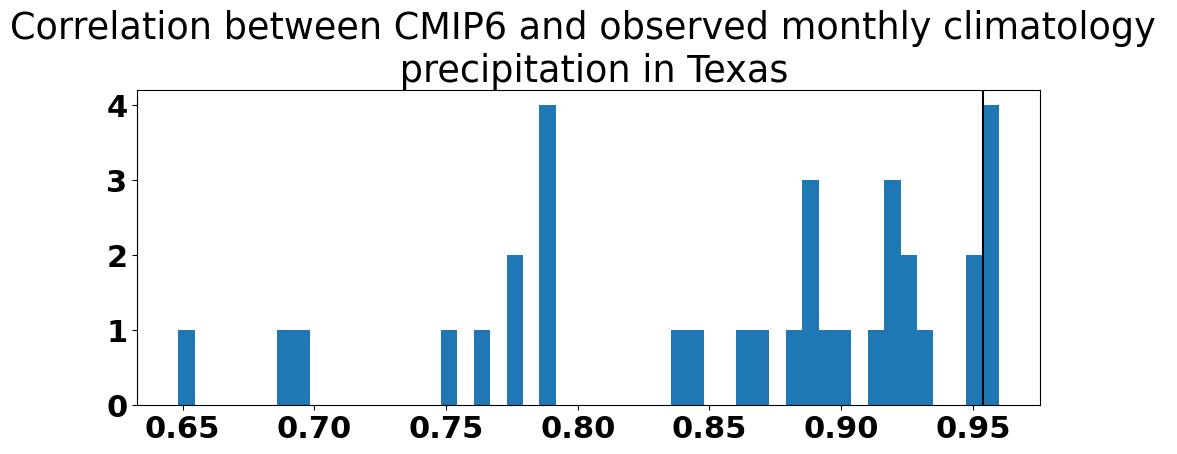

In [72]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib
import matplotlib.pyplot as plt
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)
plt.figure(figsize=(10,5))
plt.hist(df_corr['corr'].values, bins=50)
plt.axvline(x=np.percentile(df_corr['corr'].values, 90), color='black')
plt.title('Correlation between CMIP6 and observed monthly climatology \n precipitation in Texas')
plt.annotate('90th percentile \n = '+str(np.percentile(df_corr['corr'].values, 90)), xy =(0.33, 10))
plt.tight_layout()
plt.savefig('correlation_seasonal_pr.png', dpi=500)

In [73]:
# !mkdir /content/drive/MyDrive/punjab
# #!cp correlation_seasonal_pr.png /content/drive/MyDrive/iran
# !cp correlation_punjab.csv /content/drive/MyDrive/punjab

In [79]:
print(np.sum(df_corr['corr'].values>np.percentile(df_corr['corr'].values,90)))

4


In [80]:
df_corr_ = df_corr[df_corr['corr']>np.percentile(df_corr['corr'].values,90)]
df_corr_ = df_corr_.reset_index(drop=True)
print(df_corr_)

              model      corr
0  EC-Earth3-Veg-LR  0.957025
1         EC-Earth3  0.959980
2            MIROC6  0.955036
3     MPI-ESM1-2-HR  0.955479


In [81]:
print(np.sum(df_corr['corr'].values>np.percentile(df_corr['corr'].values,80)))

10


In [83]:
df_corr_ = df_corr[df_corr['corr']>np.percentile(df_corr['corr'].values,80)]
df_corr_ = df_corr_.reset_index(drop=True)
print(df_corr_)

              model      corr
0  EC-Earth3-Veg-LR  0.957025
1         EC-Earth3  0.959980
2       GISS-E2-1-G  0.951304
3          IITM-ESM  0.931034
4         INM-CM5-0  0.947745
5            MIROC6  0.955036
6     MPI-ESM1-2-HR  0.955479


In [84]:
print(np.sum(df_corr['corr'].values>np.percentile(df_corr['corr'].values,70)))

10


In [85]:
df_corr_ = df_corr[df_corr['corr']>np.percentile(df_corr['corr'].values,70)]
df_corr_ = df_corr_.reset_index(drop=True)
print(df_corr_)

              model      corr
0     ACCESS-ESM1-5  0.928639
1      CMCC-CM2-SR5  0.922218
2  EC-Earth3-Veg-LR  0.957025
3         EC-Earth3  0.959980
4         GFDL-ESM4  0.927683
5       GISS-E2-1-G  0.951304
6          IITM-ESM  0.931034
7         INM-CM5-0  0.947745
8            MIROC6  0.955036
9     MPI-ESM1-2-HR  0.955479


In [ ]:
best_models = df_corr_.iloc[:,0].values
best_models

array(['ACCESS-ESM1-5', 'CESM2-WACCM', 'IITM-ESM', 'NorESM2-MM'],
      dtype=object)

In [ ]:
!pip install awscli
!pip install cftime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.2/548.2 kB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.5 MB/s eta 0:00:00
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9
    Uninstalling rsa-4.9:
      Successfully uninstalled rsa-4.9
  Attempting uninstall: docutils
    Found existing installation: docutils 0.18.1
    Uninstalling docutils-0.18.1:
      Successfully uninstalled docutils-0.18.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires openai, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Manually wrote the best models
vars = ['pr', 'rsds', 'sfcWind', 'tas', 'tasmin', 'tasmax', 'hurs', 'huss']
vars = ['pr', 'rsds', 'sfcWind', 'tasmin', 'tasmax']
vars = ['tasmin', 'tasmax']
vars = ['tasmax']
scenarios = ["historical", "ssp245", "ssp585"]


best_models = [ 'ACCESS-ESM1-5', 'CESM2-WACCM', 'IITM-ESM', 'NorESM2-MM']
ensembles = [ 'r1i1p1f1','r3i1p1f1', 'r1i1p1f1', 'r1i1p1f1']

best_models = [ 'NorESM2-MM']
ensembles = [  'r1i1p1f1']


# best_models = [ 'NorESM2-MM']
# ensembles = [  'r1i1p1f1']
lat_start, lat_end, lon_start, lon_end =  29, 33, 73, 77

In [ ]:
import xarray as xr
# lat_start, lat_end, lon_start, lon_end = -90, 90, 0, 360
for i_var,var in enumerate(vars):
    !rm -rf {var}_day_*.nc
    for i_model,model in enumerate(best_models):
        for scenario in scenarios:
            if scenario=="historical":
                start_year = 1979
                end_year = 2013
            else:
                start_year = 2015
                end_year = 2100
            years = list(range(start_year, end_year + 1))
            for year in years:
                print(year)
                !time aws s3 cp --no-sign-request s3://nex-gddp-cmip6/NEX-GDDP-CMIP6/{model}/{scenario}/{ensembles[i_model]}/{var}/{var}_day_{model}_{scenario}_{ensembles[i_model]}_gn_{str(year)}.nc .
                !time aws s3 cp --no-sign-request s3://nex-gddp-cmip6/NEX-GDDP-CMIP6/{model}/{scenario}/{ensembles[i_model]}/{var}/{var}_day_{model}_{scenario}_{ensembles[i_model]}_gr_{str(year)}.nc .
                !time aws s3 cp --no-sign-request s3://nex-gddp-cmip6/NEX-GDDP-CMIP6/{model}/{scenario}/{ensembles[i_model]}/{var}/{var}_day_{model}_{scenario}_{ensembles[i_model]}_gr1_{str(year)}.nc .
                !time aws s3 cp --no-sign-request s3://nex-gddp-cmip6/NEX-GDDP-CMIP6/{model}/{scenario}/{ensembles[i_model]}/{var}/{var}_day_{model[:-4]}_{scenario}_{ensembles[i_model]}_gr2_{str(year)}.nc .
            try:
                ds_hist = xr.open_mfdataset(var+'_day*.nc')[var].sel(lat=slice(lat_start, lat_end)).sel(lon=slice(lon_start, lon_end)).compute()
                #ds_hist = xr.open_mfdataset(var+'_day*.nc')[var].compute()
            except:
                ds_hist = xr.open_mfdataset(var+'_day*.nc', decode_times=False)[var].sel(lat=slice(lat_start, lat_end)).sel(lon=slice(lon_start, lon_end)).compute()
                #ds_hist = xr.open_mfdataset(var+'_day*.nc', decode_times=False)[var].compute()
                time_values = ds_hist['time'].values
                time_units = ds_hist['time'].attrs['units']
                calendar = ds_hist['time'].attrs.get('calendar', 'standard')
                datetimes = cftime.num2date(time_values, units=time_units, calendar=calendar)
                ds_hist['time'] = datetimes
            ds_hist.to_netcdf('punjab_'+var+'_day_'+model+'_'+scenario+'_'+ensembles[i_model]+'_'+str(start_year)+'_'+str(end_year)+'.nc')
            !mv 'punjab_'+var+'_day_'+model+'_'+scenario+'_'+ensembles[i_model]+'_'+str(start_year)+'_'+str(end_year)+'.nc' /content/drive/MyDrive/punjab
            !rm -rf {var}_day_*.nc


1979
download: s3://nex-gddp-cmip6/NEX-GDDP-CMIP6/NorESM2-MM/historical/r1i1p1f1/tasmax/tasmax_day_NorESM2-MM_historical_r1i1p1f1_gn_1979.nc to ./tasmax_day_NorESM2-MM_historical_r1i1p1f1_gn_1979.nc

real	0m6.345s
user	0m3.459s
sys	0m1.610s
fatal error: An error occurred (404) when calling the HeadObject operation: Key "NEX-GDDP-CMIP6/NorESM2-MM/historical/r1i1p1f1/tasmax/tasmax_day_NorESM2-MM_historical_r1i1p1f1_gr_1979.nc" does not exist

real	0m0.930s
user	0m0.730s
sys	0m0.101s
fatal error: An error occurred (404) when calling the HeadObject operation: Key "NEX-GDDP-CMIP6/NorESM2-MM/historical/r1i1p1f1/tasmax/tasmax_day_NorESM2-MM_historical_r1i1p1f1_gr1_1979.nc" does not exist

real	0m0.881s
user	0m0.708s
sys	0m0.092s
fatal error: An error occurred (404) when calling the HeadObject operation: Key "NEX-GDDP-CMIP6/NorESM2-MM/historical/r1i1p1f1/tasmax/tasmax_day_NorESM_historical_r1i1p1f1_gr2_1979.nc" does not exist

real	0m0.877s
user	0m0.682s
sys	0m0.091s
1980
download: s3://nex-gd

In [ ]:
!mv punjab*.nc  /content/drive/MyDrive/punjab

In [ ]:
!cp *.nc /content/drive/MyDrive/iran

In [ ]:
!ls  /content/drive/MyDrive/

ls: cannot access '/content/drive/MyDrive/': No such file or directory


In [ ]:
import xarray as xr
ds = xr.open_dataset('nigeria_tasmin_day_MIROC-ES2L_ssp245_r1i1p1f2_2015_2100.nc')

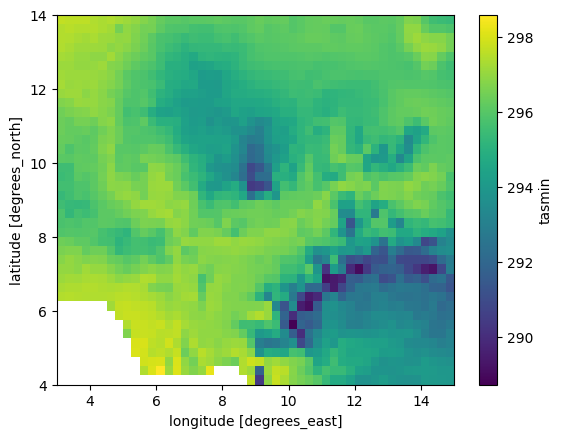

In [ ]:
ds.tasmin.mean(dim='time').plot()

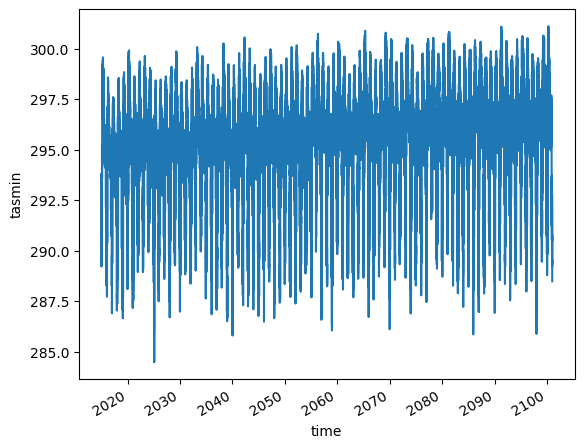

In [ ]:
ds.tasmin.mean(dim='lat').mean(dim='lon').plot()